# Import libraries and datasets

In [24]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
from IPython.display import Image

This code is a series of instructions using the Pandas library to load multiple CSV files containing data related to an Airbnb project. Each CSV file contains specific information that will be used for analysis or modeling.

# pyspark

users = pd.read_csv('/opt/bitnami/spark/airbnb_data/train_users_2.csv')
countries = pd.read_csv('/opt/bitnami/spark/airbnb_data/countries.csv')
sessions = pd.read_csv('/opt/bitnami/spark/airbnb_data/sessions2.csv')
age_gender_bkts = pd.read_csv('/opt/bitnami/spark/airbnb_data/age_gender_bkts.csv')

sample_submission_NDF = pd.read_csv('/opt/bitnami/spark/airbnb_data/sample_submission_NDF.csv')
test_users = pd.read_csv('/opt/bitnami/spark/airbnb_data/test_users.csv')

In [25]:
train_user = pd.read_csv('data/train_users_2.csv')
country = pd.read_csv('data/countries.csv')
session = pd.read_csv('data/sessions2.csv')
age_gender = pd.read_csv('data/age_gender_bkts.csv')

this code displays the shape of each dataframe loaded from the CSV files, allowing you to understand the size of each dataset and the amount of information contained in each dataframe.

In [26]:
print('country' ,country.shape)
print('age_gender',age_gender.shape)
print('session',session.shape)
print('train_user' ,train_user.shape)

country (10, 7)
age_gender (420, 5)
session (4314, 6)
train_user (213451, 16)


this code generates a summary dataframe called info_dataset that contains information such as the number of columns, column names and number of rows for each dataset loaded from the CSV files. The color gradient style is applied to facilitate the visualization of information.

In [27]:
dataset = [country , age_gender ,session , train_user]
titles = ["countries","age_genders","sessions","train_users"]
info_dataset = pd.DataFrame({},)
info_dataset['dataset']= titles



info_dataset = pd.DataFrame({},)
info_dataset['dataset']= titles

info_dataset['no_of_columns']= [len(df.columns) for df in dataset ]
info_dataset['columns_name']= [', '.join(list(df.columns)) for df in dataset] 
info_dataset['no_of_rows'] = [len(df) for df in dataset]
info_dataset.style.background_gradient(cmap ='Greys')

this code is intended to show you how many null values are present in each column of each dataframe.
This can help identify areas where data is missing and make management decisions 
of these values missing in the subsequent analysis or modelling.

In [28]:
print(country.isnull().sum())
print(age_gender.isnull().sum())
print(session.isnull().sum())
print(train_user.isnull().sum())

country_destination              0
lat_destination                  0
lng_destination                  0
distance_km                      0
destination_km2                  0
destination_language             0
language_levenshtein_distance    0
dtype: int64
age_bucket                 0
country_destination        0
gender                     0
population_in_thousands    0
year                       0
dtype: int64
user_id            0
action            55
action_type      572
action_detail    572
device_type        1
secs_elapsed      41
dtype: int64
id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
fir

This code is intended to show you how many missing values (or null values) are present in each column 
of each dataframe. This can help you identify areas where data is missing and decide how to
manage these missing values in subsequent analysis or modelling.

In [29]:
print(country.isna().sum())
print(age_gender.isna().sum())
print(session.isna().sum())
print(train_user.isna().sum())

country_destination              0
lat_destination                  0
lng_destination                  0
distance_km                      0
destination_km2                  0
destination_language             0
language_levenshtein_distance    0
dtype: int64
age_bucket                 0
country_destination        0
gender                     0
population_in_thousands    0
year                       0
dtype: int64
user_id            0
action            55
action_type      572
action_detail    572
device_type        1
secs_elapsed      41
dtype: int64
id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
fir

 this code generates a destination count graph per enrollment flow for training users. Each bar represents the number of users who have chosen a certain signup stream, colored according to their country destination. This chart allows you to visualize destination trends based on enrollment flow choices.

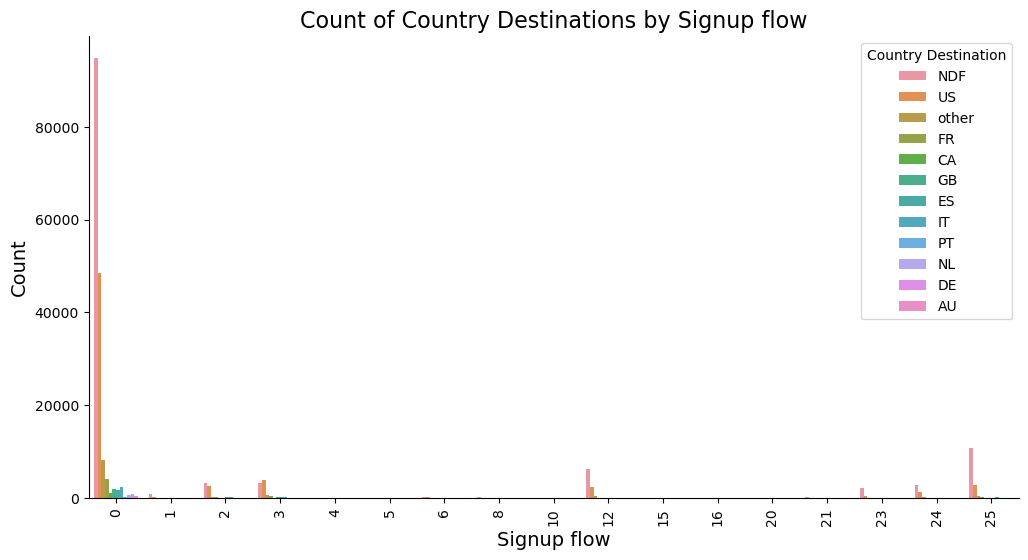

In [30]:
signup_flow = train_user["signup_flow"]
country_destination = train_user["country_destination"]

# Créer un graphique de comptage des destinations par signup flow
plt.figure(figsize=(12, 6))
sns.countplot(x=signup_flow, hue=country_destination, data=train_user)
plt.title('Count of Country Destinations by Signup flow', fontsize=16)
plt.xlabel('Signup flow', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Country Destination')
plt.xticks(rotation=90)
sns.despine()
plt.show()

ce code génère un graphique de comptage des flux d’enregistrement par pays de destination pour les utilisateurs de formation.
Chaque barre représente le nombre d’utilisateurs qui ont choisi un certain flux d’enregistrement, coloré selon
pays de destination. Le graphique est agrandi pour tenir compte
résultats plus détaillés.

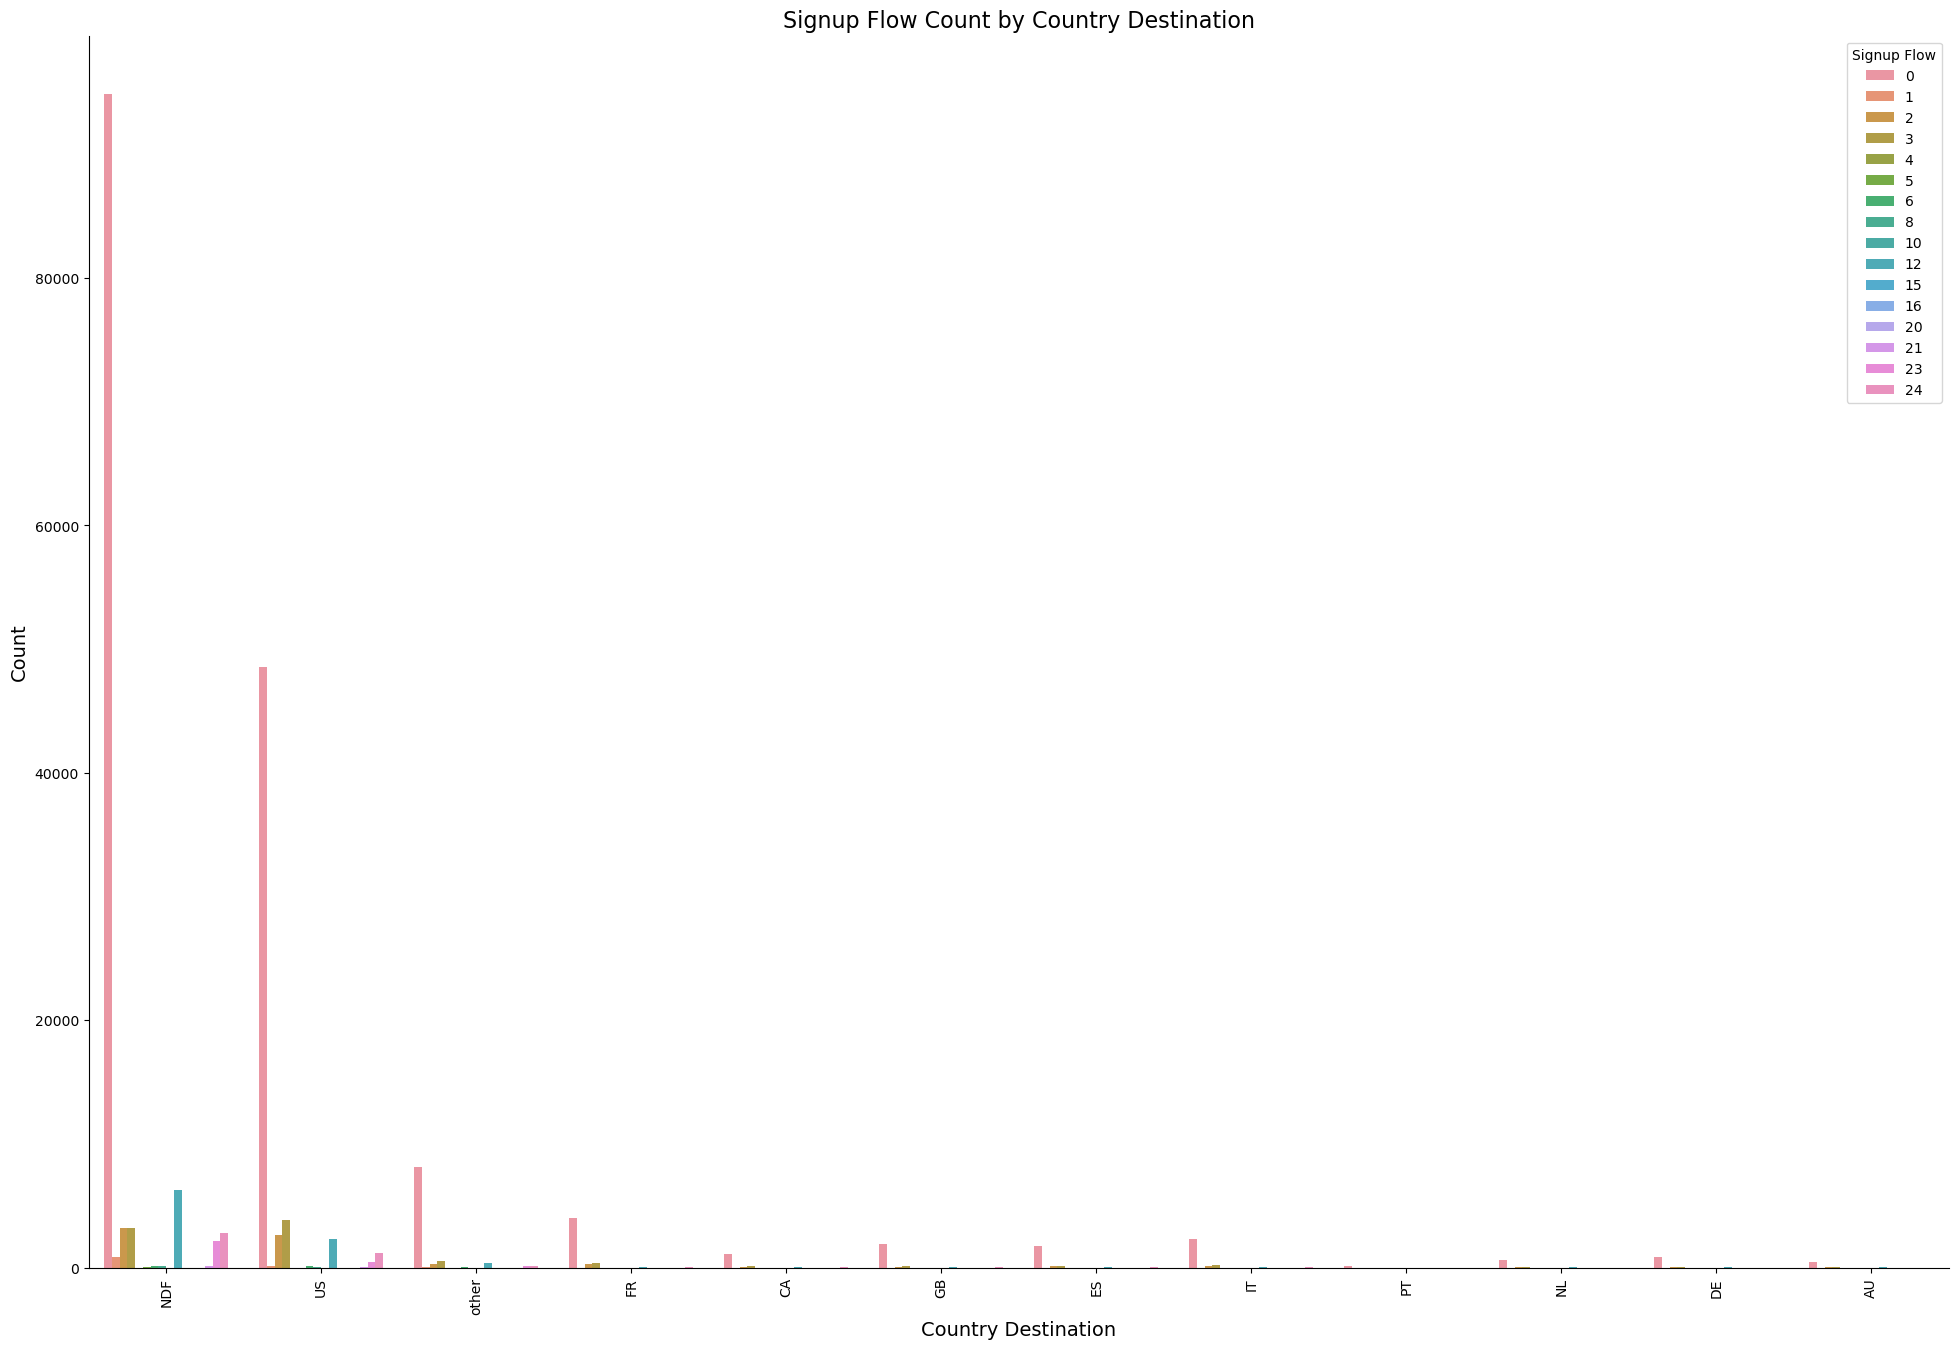

In [31]:
filtered_data = train_user[train_user['signup_flow'] < 25]  # Vous pouvez ajuster la condition ici
plt.figure(figsize=(24, 16))
sns.countplot(data=filtered_data, x='country_destination', hue='signup_flow')
plt.title('Signup Flow Count by Country Destination', fontsize=16)
plt.xlabel('Country Destination', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Signup Flow')
plt.xticks(rotation=90)
sns.despine()
plt.show()

This code generates a graph of age ranges by country destination for training users.
Each bar represents the number of users of a certain age group, colored according to their country destination.
The graph is enlarged to allow a more detailed visualization of the results.

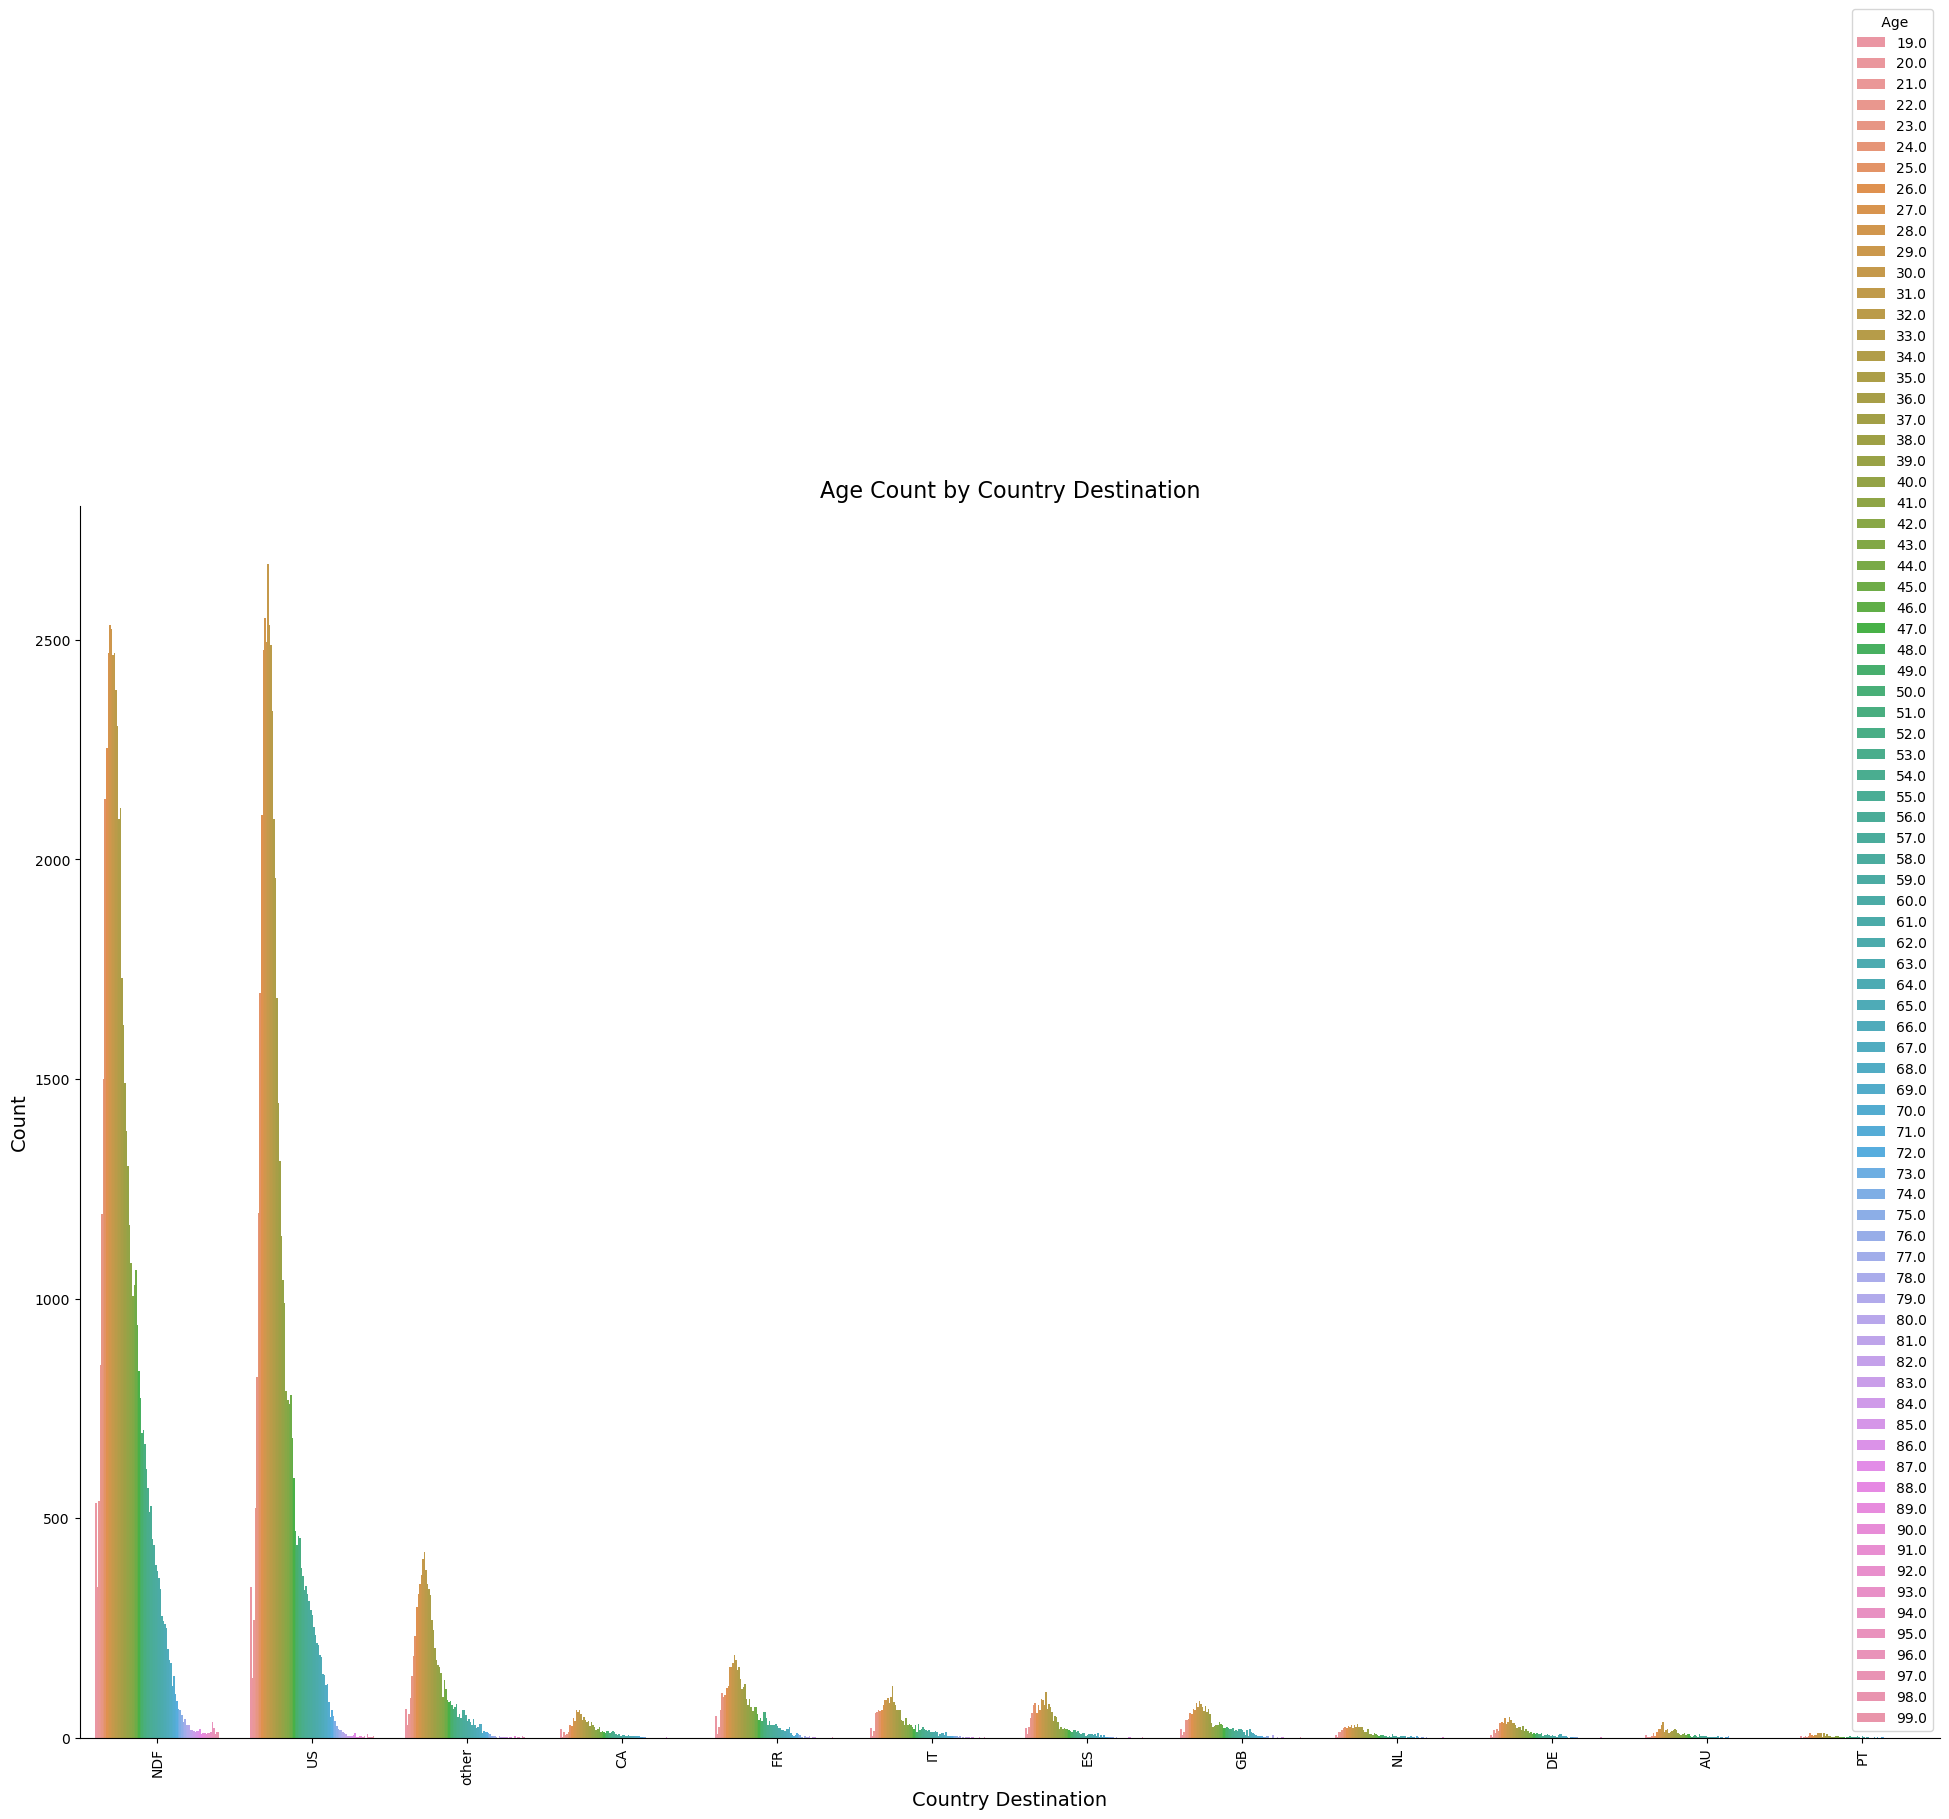

In [32]:
filtered_data = train_user[(train_user['age'] > 18) & (train_user['age'] < 100)]  # Vous pouvez ajuster la condition ici
plt.figure(figsize=(24, 16))
sns.countplot(data=filtered_data, x='country_destination', hue='age')
plt.title('Age Count by Country Destination', fontsize=16)
plt.xlabel('Country Destination', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title=' Age')
plt.xticks(rotation=90)
sns.despine()
plt.show()

It appears that you are creating a pie chart using the “matplotlib” and “seaborn” libraries to visualize the distribution of enrollment methods in the user DataFrame. The code you provided will generate a pie chart with labels indicating the registration methods and their respective percentages

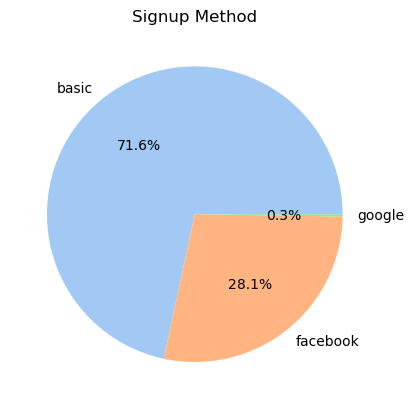

<Figure size 640x480 with 0 Axes>

In [33]:
score_signup_method = train_user['signup_method'].value_counts()

# Set the color palette for the pie chart
colors = sns.color_palette('pastel')[0:len(score_signup_method)]

# Create a pie chart
plt.pie(score_signup_method, labels=score_signup_method.index, autopct='%1.1f%%', colors=colors)
plt.title("Signup Method")
plt.show()

#pyspark
plt.savefig('res/pie_chart.png')

It looks like you’re trying to create a countplot using Seaborn to visualize the distribution of user enrollment methods based on the signup_flow column of a DataFrame named train_user. In addition, you save the trace as an image file using Matplotlib

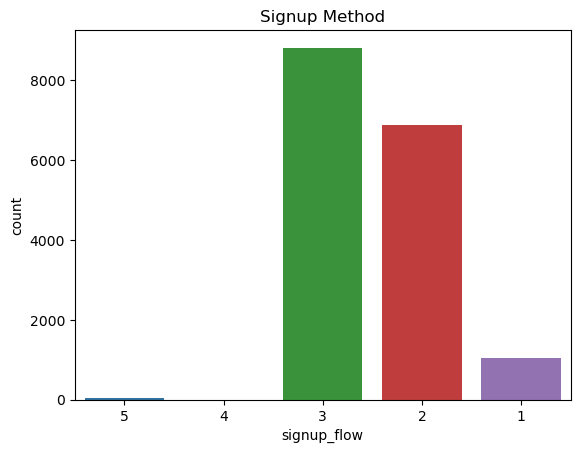

In [34]:
sns.countplot(x='signup_flow', data=train_user , order=[5,4,3,2,1])
plt.title("Signup Method", size=12);

#pyspark
plt.savefig('res/signup_method.png')

It looks like you’re trying to create a countplot using Seaborn to visualize the destination language distribution based on the destination_languagecolumn of a country named DataFrame. You also want to save the trace as an image file using Matplotlib

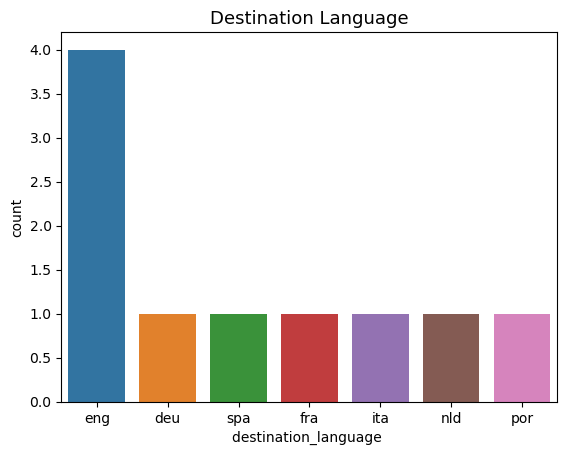

In [35]:
sns.countplot(x='destination_language ', data=country)
plt.title("Destination Language", size=13);

#pyspark
plt.savefig('res/destination_language.png')

Your code snippet is on track to adjust the plot size before creating a countplot using Seaborn. You also save the plot as an image using Matplotlib. However, there is a minor fix needed: you use plt.subplots(figsize=(12,8)) to create the sublot, but not explicitly using the sublot created when you draw the countplot

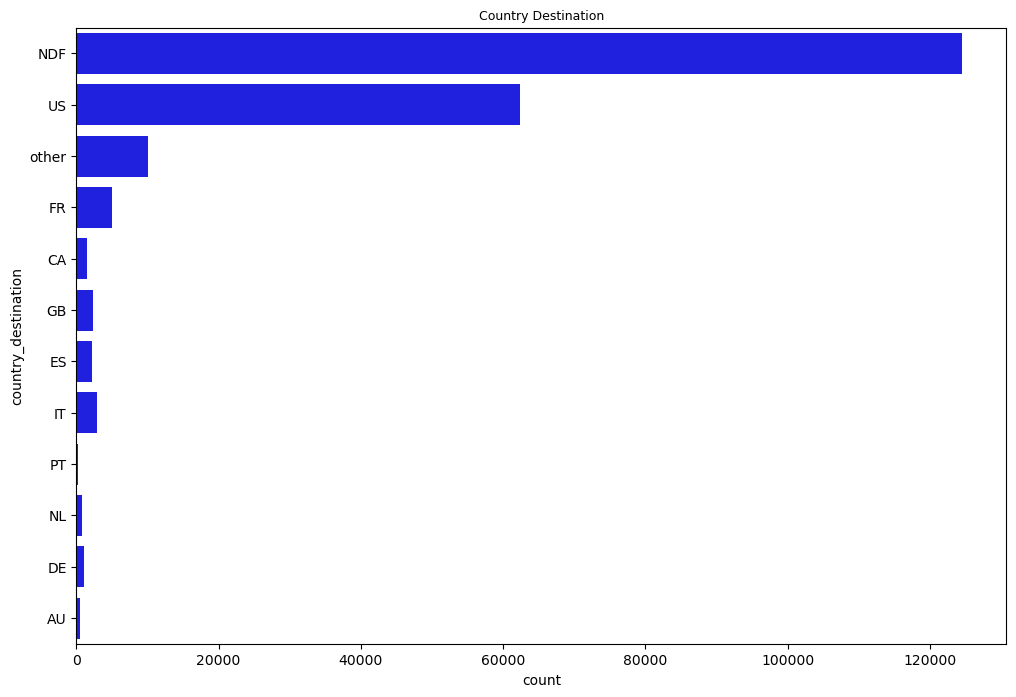

In [36]:
plt.subplots(figsize=(12,8 )) #is used to adjust the size of the plot before creating any visualizations. It specifies the dimensions of the plot in inches (width, height). 
sns.countplot(y='country_destination', data=train_user ,color = 'blue')
plt.title("Country Destination", size=9);

#pyspark
plt.savefig('res/country_destination2.png')

It looks like you're creating a new DataFrame `new_df` by selecting specific columns from the `users` and `sessions` DataFrames and then saving this new DataFrame to a CSV file named 'users_sessions.csv'. This process involves creating a DataFrame with selected columns and saving it to a file.

In [37]:
new_df = pd.DataFrame({
    'country_destination':train_user['country_destination'],
    'device_type':session['device_type'],})

#jupyter
new_df.to_csv('data/users_sessions.csv', index=False)

#pyspark
# new_df.to_csv('/opt/bitnami/spark/airbnb_data/users_sessions.csv', index=False)

It appears that you're performing some data analysis using the `new_df` DataFrame to find the most common country destinations based on the count of different device types used

In [38]:
most_country_destination = new_df.groupby(['country_destination'], as_index=False)['device_type'].count().rename( columns = {'device_type':'total'})

most_country_destination['%'] = round((most_country_destination['total'] / most_country_destination['total'].sum()) * 100, 2)
most_country_destination.nlargest(15, 'total')

country_destination  total      %
10                  US   1882  43.64
7                  NDF   1749  40.55
4                   FR    205   4.75
11               other    154   3.57
3                   ES     75   1.74
5                   GB     62   1.44
6                   IT     61   1.41
1                   CA     60   1.39
2                   DE     30   0.70
8                   NL     21   0.49
0                   AU     10   0.23
9                   PT      4   0.09

The code you've provided is creating a bar plot using the `seaborn` library to visualize the top 15 country destinations based on their percentages in the `most_country_destination` DataFrame.

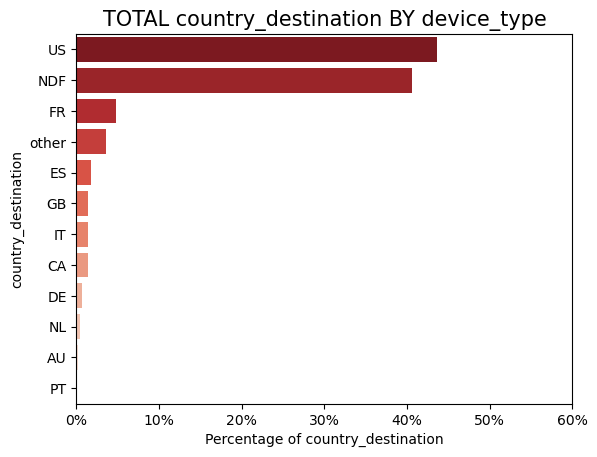

<Figure size 640x480 with 0 Axes>

In [39]:
most = sns.barplot(y='country_destination', x='%', palette='Reds_r', data=most_country_destination.nlargest(15, '%'))

plt.title('TOTAL country_destination BY device_type', size=15)
plt.yticks(fontsize=10, color='black')
plt.xticks([0, 10, 20, 30, 40, 50, 60], ['0%', '10%', '20%', '30%', '40%', '50%', '60%'], fontsize=10)
plt.xlabel("Percentage of country_destination")

plt.show()

#pyspark
plt.savefig('res/Percentage_of_country_destination.png')

The code you've provided is creating a heatmap to visualize the relationship between 'country_destination' and 'device_type' using the `seaborn` and `matplotlib` libraries.

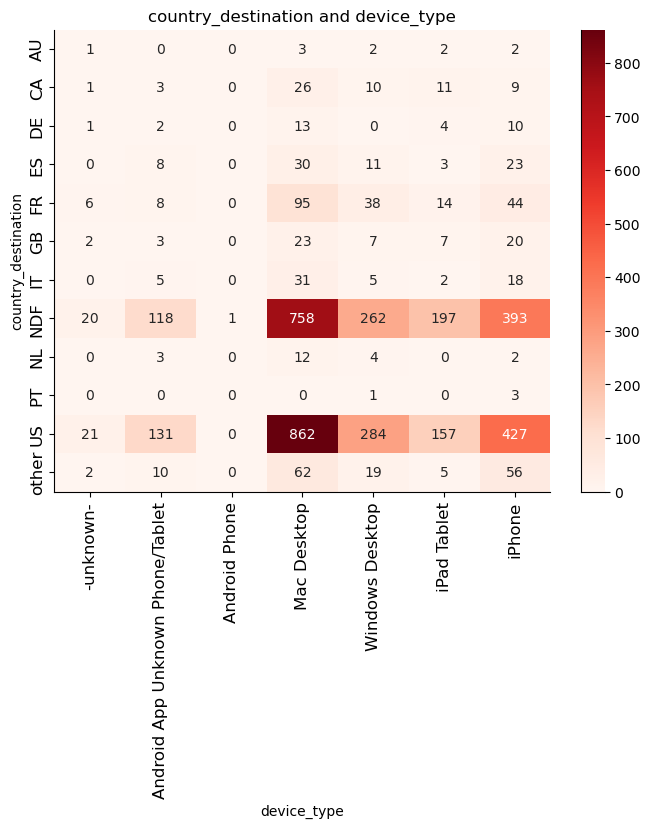

<Figure size 640x480 with 0 Axes>

In [40]:
cont_table = pd.crosstab(train_user['country_destination'], session['device_type'])
plt.figure(figsize=(8, 6))
plt.title('country_destination and device_type')
sns.heatmap(cont_table, cmap='Reds', annot=True, fmt='d')
plt.tick_params(axis='both', which='major', labelsize=12)
sns.despine()
plt.show()

#pyspark
plt.savefig('res/country_destination_and_device_type.png')

The code you've provided is creating a scatter plot using the `seaborn` and `matplotlib` libraries to visualize the relationship between 'age' from the `users` DataFrame and 'secs_elapsed' from the `sessions` DataFrame

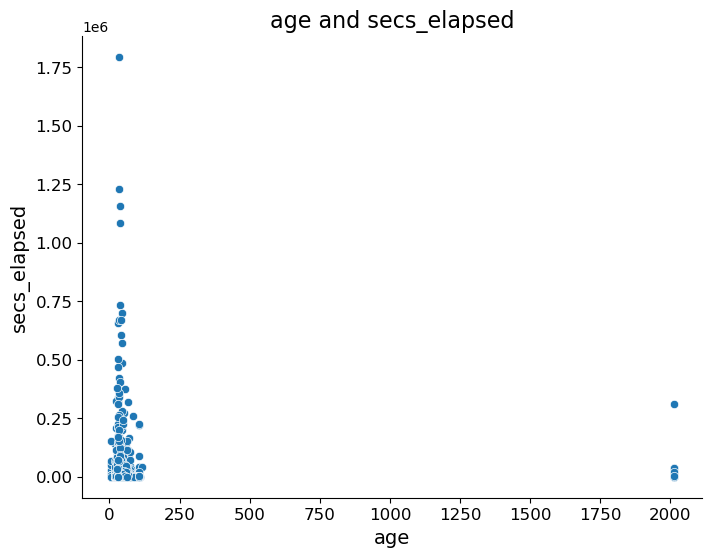

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_user['age'], y=session['secs_elapsed'])
plt.title('age and secs_elapsed', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.ylabel('secs_elapsed', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.despine()
plt.show()

In [43]:
max_value = train_user['age'].max()
print("Maximum value:", max_value)

Maximum value: 2014.0


The code you've provided is creating a scatter plot that focuses on the relationship between 'age' from the `users` DataFrame (filtered to include only ages below 100) and 'secs_elapsed' from the `sessions` DataFrame.

C:\Users\ayoub\AppData\Local\Temp\ipykernel_15524\4138120344.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = filtered_data[18 < train_user['age']]


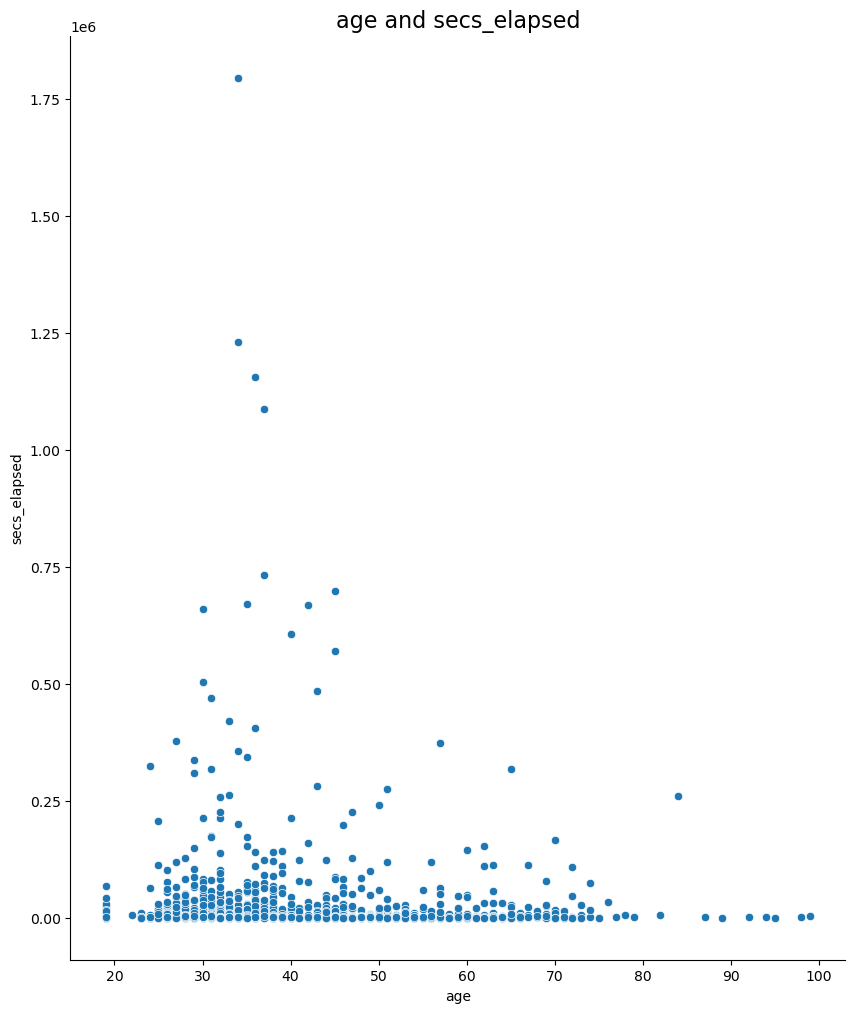

In [44]:
filtered_data = train_user[users['age'] < 100]
filtered_data = filtered_data[18 < train_user['age']]
plt.figure(figsize=(10,12))
sns.scatterplot(x=filtered_data['age'], y=session['secs_elapsed'])
plt.title('age and secs_elapsed', fontsize=16)
sns.despine()
plt.show()

The code you've provided is creating a histogram using the `seaborn` library to visualize the distribution of ages from the `users` DataFrame (filtered to include only ages below 100).

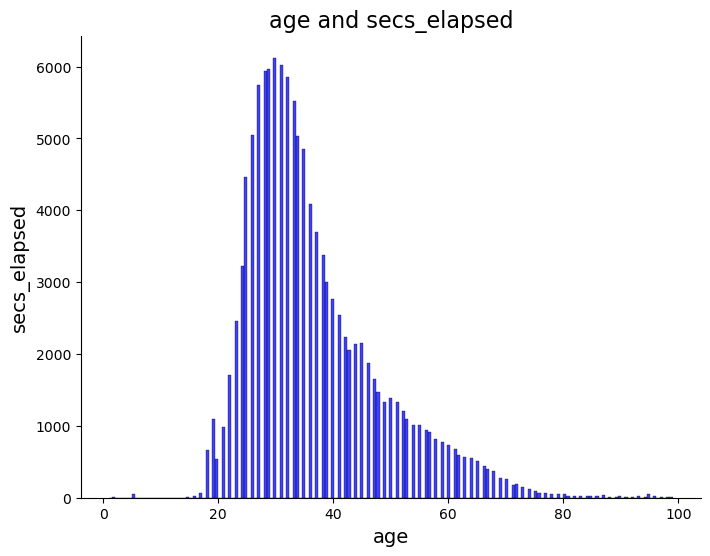

In [46]:
filtered_data = train_user[users['age'] <100]
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data['age'], color='blue')
plt.title('age and secs_elapsed', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.ylabel('secs_elapsed', fontsize=14)
sns.despine()
plt.show()

The code you've provided is merging the `users`, `countries`, and `age_gender_bkts` DataFrames based on the 'country_destination' column and then creating a heatmap to visualize the correlation matrix between selected columns.

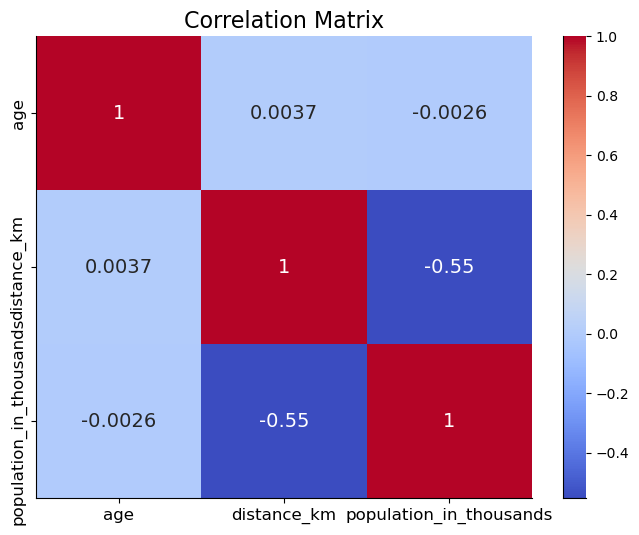

In [47]:
merged_data = pd.merge(train_user, country, on='country_destination')
merged_data = pd.merge(merged_data, age_gender, on='country_destination')
corr_matrix = merged_data[['age','distance_km' ,'population_in_thousands']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', annot_kws={'size': 14})
plt.title('Correlation Matrix', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.despine()
plt.show()

The code you've provided is using the `plotly.express` library to create a line plot to visualize the relationship between 'country_destination' and 'device_type' from the `new_df` DataFrame.

In [48]:
import plotly.express as px

fig = px.line(new_df, x="country_destination", y="device_type", color='device_type', title='country_destination & device_type')

fig.update_layout(
    title="country_destination & device_type",
    xaxis_title="country_destination",
    yaxis_title="device_type",
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="#7f7f7f"
    )
)
fig.show()

It looks like you're performing some data analysis using the `users` and `countries` DataFrames, calculating the mean values of certain columns based on age and signup flow, and then sorting and selecting the top 15 rows.

In [49]:
merged_data= pd.merge(train_user, country , on= 'country_destination')

MeanSales_cat = merged_data.groupby(['age']).agg({'signup_flow':'mean', 'timestamp_first_active':'mean'})
MeanSales_cat = MeanSales_cat.sort_values(ascending=False, by='signup_flow')[:15].reset_index()
MeanSales_cat

age  signup_flow  timestamp_first_active
0   1931.0         24.0            2.014052e+13
1   2008.0         24.0            2.014042e+13
2   1929.0         23.5            2.014052e+13
3   1942.0         23.0            2.014031e+13
4   1949.0         17.5            2.013072e+13
..     ...          ...                     ...
93  1938.0          0.0            2.014053e+13
94  1947.0          0.0            2.014062e+13
95    16.0          0.0            2.014052e+13
96  1926.0          0.0            2.014063e+13
97    15.0          0.0            2.012699e+13

[98 rows x 3 columns]

The code you've provided is creating a bar plot using the `seaborn` library to visualize the relationship between 'age' and 'signup_flow' in the `users` DataFrame.

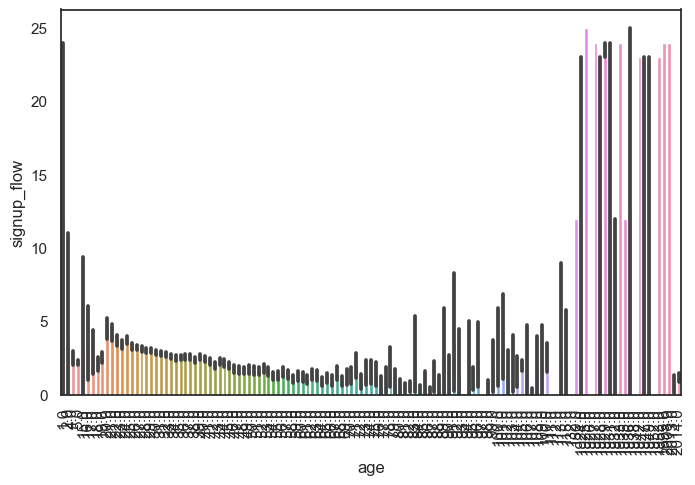

In [50]:
plt.figure(figsize=(8,5))

sns.set(style='white')
sns.set_palette("PuRd")

sns.barplot(x="age", y='signup_flow', data=train_user)
plt.xticks(rotation=90)
plt.show()

The code you've provided is performing some date-related operations on the `users` DataFrame and then creating a heatmap using the `seaborn` library to visualize the count of account creations based on the day of the week and month.

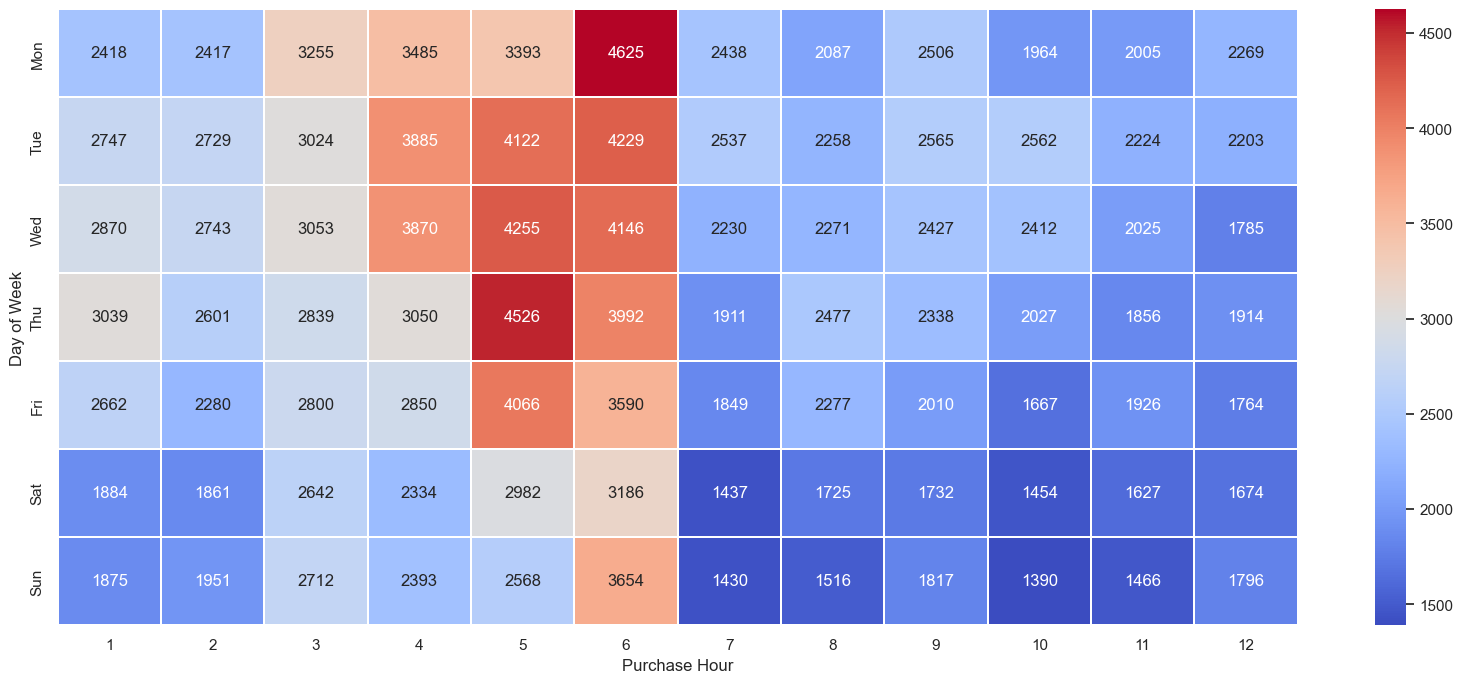

In [53]:
date_columns = ['date_account_created', 'date_first_booking']
for col in date_columns:
    train_user[col] = pd.to_datetime(train_user[col], format='%Y-%m-%d')
    
    
train_user['order_purchase_year'] = train_user.date_account_created.apply(lambda x: x.year)
train_user['order_purchase_month'] = train_user.date_account_created.apply(lambda x: x.month)
train_user['order_purchase_dayofweek'] = train_user.date_account_created.apply(lambda x: x.dayofweek)
train_user['order_purchase_day'] = train_user['order_purchase_dayofweek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
train_user['order_purchase_mon'] = train_user.date_account_created.apply(lambda x: x.month).map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

purchase_count = train_user.groupby(['order_purchase_day', 'order_purchase_month']).nunique()['id'].unstack()
plt.figure(figsize=(20,8))
sns.heatmap(purchase_count.reindex(index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']), cmap="coolwarm", annot=True, fmt="d", linewidths=0.2)
plt.xlabel('Purchase Hour')
plt.ylabel('Day of Week')
plt.show()